In [12]:
import torch
words=open("names.txt",'r').read().splitlines()
from sklearn.model_selection import train_test_split
len(words)

32033

In [13]:
x_set,test_set=train_test_split(words, test_size=0.1, random_state=32)
train_set,dev_set=train_test_split(x_set, test_size=0.11, random_state=32)

In [15]:
max(len(w) for w in words)

15

In [5]:
#sorted(b.items(), key=lambda kv: -kv[1])

In [17]:
import torch

In [14]:
chars=sorted(list(set("".join(words))))
#print(chars)
stoi={s:i+1 for i,s in enumerate(chars)}
stoi["."]=0
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [15]:
N=torch.zeros((27,27),dtype=torch.int32)
N

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],


In [16]:
for w in train_set:
    chs=['.']+list(w)+['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        N[ix1,ix2]+=1
print(N)
#maxx=torch.max(N)
#print(N/maxx)

tensor([[   0, 3567, 1031, 1251, 1347, 1229,  328,  533,  715,  469, 1991, 2341,
         1237, 2035,  917,  305,  407,   73, 1298, 1656, 1046,   63,  304,  251,
          107,  425,  731],
        [5331,  443,  438,  389,  833,  546,  106,  139, 1859, 1324,  144,  456,
         2039, 1325, 4341,   56,   70,   49, 2626,  875,  550,  297,  654,  125,
          129, 1652,  366],
        [  94,  250,   29,    1,   54,  533,    0,    0,   33,  171,    1,    0,
           83,    0,    3,   86,    0,    0,  677,    6,    2,   34,    0,    0,
            0,   68,    0],
        [  74,  660,    0,   33,    1,  442,    0,    2,  531,  223,    3,  264,
           91,    0,    0,  305,    0,   11,   59,    5,   34,   31,    0,    0,
            3,   84,    3],
        [ 395, 1050,    1,    0,  116, 1034,    5,   19,   84,  539,    7,    2,
           49,   25,   24,  304,    0,    1,  335,   23,    3,   71,   15,   17,
            0,  242,    1],
        [3211,  539,   89,  125,  308, 1020,   62,

In [17]:
itos={i:s for s,i in stoi.items()}


(-0.5, 26.5, 26.5, -0.5)

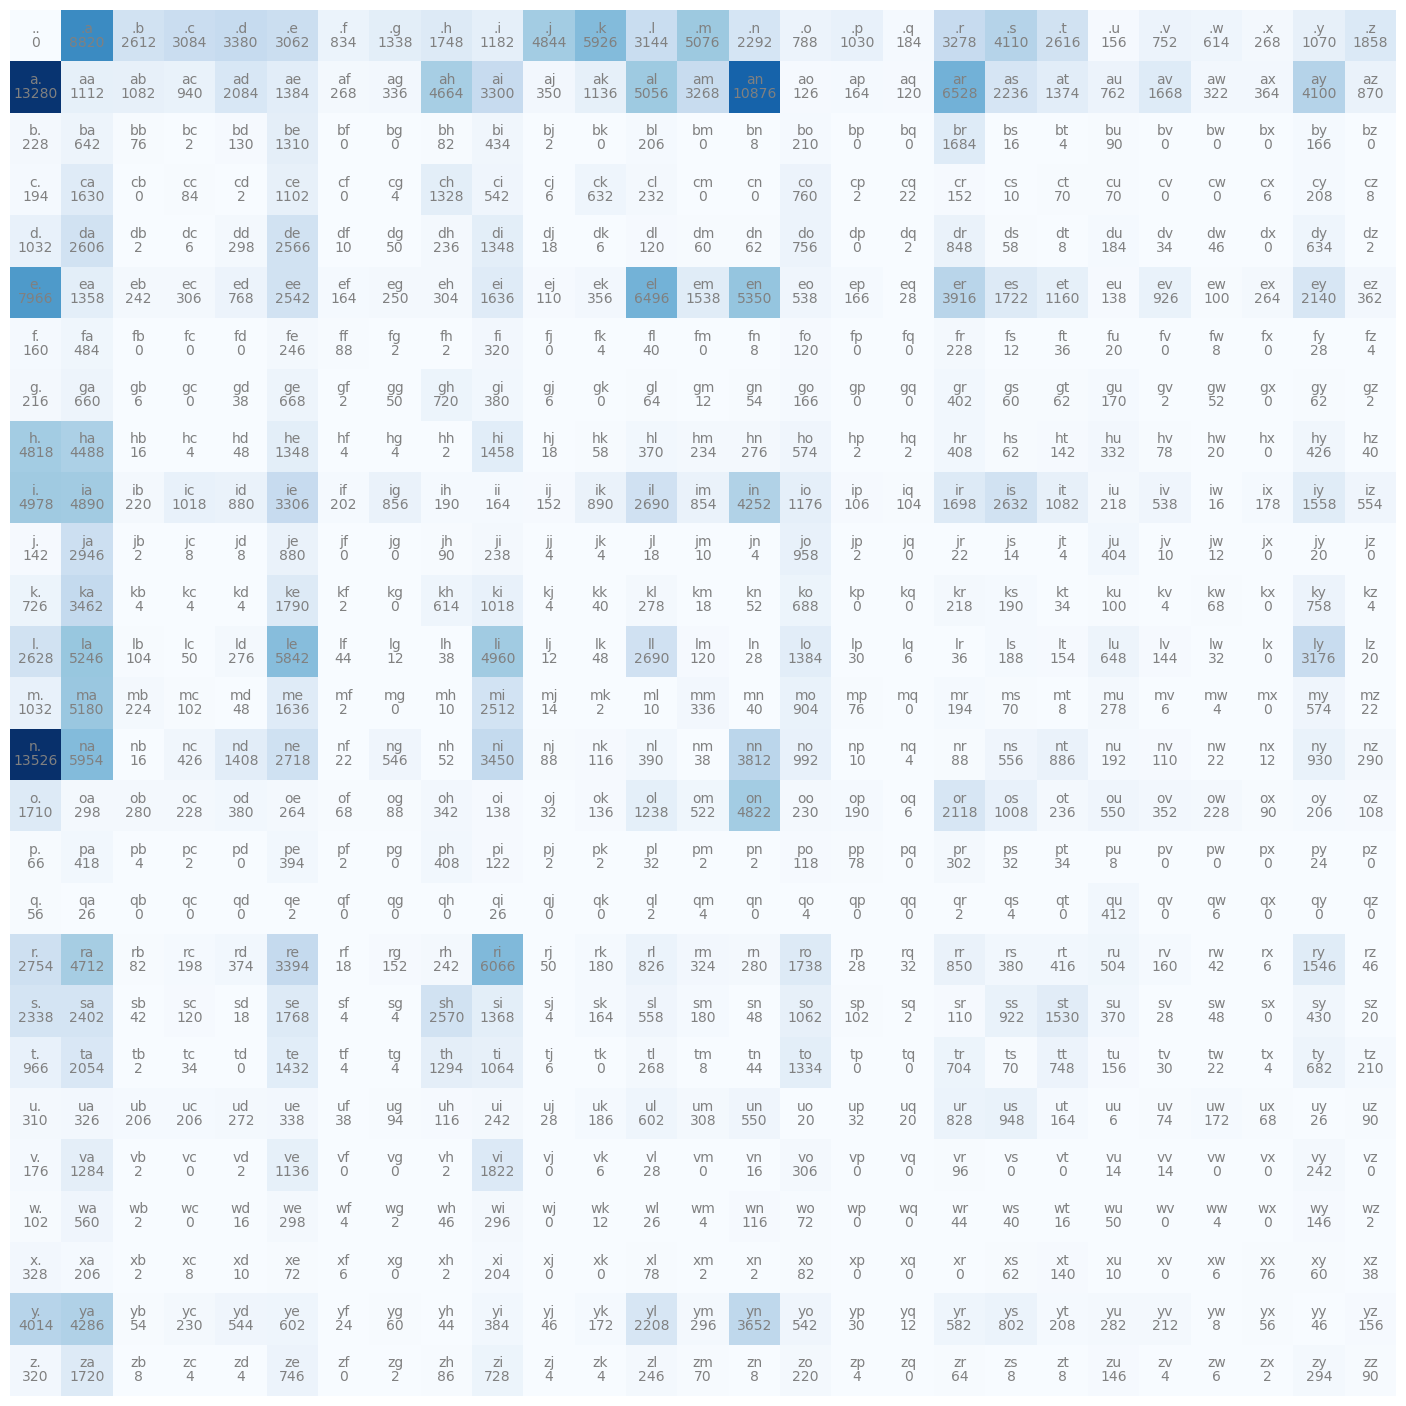

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(18,18))
plt.imshow(N,cmap="Blues")
for i in range(27):
    for j in range(27):
        chstr=itos[i]+itos[j]
        plt.text(j,i,chstr,ha="center",va="bottom",color="gray")
        plt.text(j,i,N[i,j].item(),ha="center",va="top",color="gray")
plt.axis('off')

In [18]:
g=torch.Generator().manual_seed(2147483647)
P=(N+1).float()
P=P/P.sum(1,keepdims=True)
P[0].sum()
ix=torch.multinomial(P[0],num_samples=1,replacement=True,generator=g)
ix

tensor([10])

In [19]:
g=torch.Generator().manual_seed(2147483647)

for i in range(200):
    ix=0
    out=[]
    while True:
        p=P[ix]
        ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        out.append(itos[ix])
        if ix==0:
            break
    print("".join(out))


junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.
dgossmitan.
il.
le.
pann.
that.
janreli.
isa.
dyn.
rijelumemahaunayaleva.
cararr.
jen.
janarta.
maly.
abely.
jui.
lavadoni.
themielyawat.
f.
modam.
tavilitikiesaloeverin.
n.
e.
kalbrenelah.
anen.
ch.
k.
jan.
odridrdenanialilpergha.
tezralelia.
vymalelvan.
hiahimahacelahmimi.
rasabyoni.
pe.
aliaierenn.
jayannda.
r.
ceremankesorannje.
sanoman.
kyn.
deriganazirdab.
ta.
on.
bahatelyti.
keus.
dasa.
en.
ton.
codarerlaspphalealilondesl.
finna.
m.
m.
shama.
ve.
h.
moge.
jaresynivien.
usien.
ja.
jenam.
anth.
marafrlanlylialeyngnoruriyli.
msoireviayitarkannzyaneniadahulyl.
cicvatavryaelesh.
rla.
s.
jaue.
a.
kous.
bionzinerarh.
hisisarilakamorvann.
akela.
az.
arileri.
chaiadayra.
fbrlodouseyton.
za.
sabran.
han.
ke.
etamete.
conakin.
lalastan.
tisonanisemyn.
lewes.
an.
kadarekan.
ljagezie.
fian.
kichayl

In [22]:
log_likelihood=0
n=0
for w in train_set:
    chs=['.']+list(w)+['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        prob=P[ix1,ix2]
        logprob=torch.log(prob)
        log_likelihood+=logprob
        n+=1
        print(f"{ch1}{ch2} prob:{prob}")
print(f"{log_likelihood=}")
nll=-log_likelihood
print(f"{nll=}")
print(f"{nll/n}") #here nnl is divided by n to make it comparable to other models as when no of words in 
#training data increases the nll obviously increases,but models can have varying of words so can't be compared 
#if not normalized by n

.b prob:0.04018065705895424
br prob:0.3150557577610016
re prob:0.12873810529708862
en prob:0.12896910309791565
nd prob:0.038193970918655396
da prob:0.23946228623390198
al prob:0.07503034174442291
li prob:0.17978030443191528
iz prob:0.01448256429284811
z. prob:0.06857142597436905
.j prob:0.0775580108165741
ji prob:0.03935376927256584
is prob:0.07438132911920547
se prob:0.1077088788151741
el prob:0.15937595069408417
le prob:0.20701973140239716
e. prob:0.19651269912719727
.m prob:0.07927114516496658
ma prob:0.38811254501342773
ay prob:0.060796644538640976
ya prob:0.21718133985996246
ar prob:0.09661995619535446
ri prob:0.2402196228504181
i. prob:0.14081834256649017
.p prob:0.015885375440120697
po prob:0.06032482534646988
ot prob:0.014609885402023792
tt prob:0.06530977040529251
te prob:0.12592260539531708
er prob:0.09593147784471512
r. prob:0.10834395885467529
.e prob:0.04788973554968834
el prob:0.15937595069408417
ll prob:0.09734750539064407
le prob:0.20701973140239716
ea prob:0.0330376252

.i prob:0.01829933002591133
ik prob:0.024746906012296677
ke prob:0.17711171507835388
er prob:0.09593147784471512
r. prob:0.10834395885467529
.m prob:0.07927114516496658
mi prob:0.18520589172840118
ir prob:0.047806523740291595
ra prob:0.18482203781604767
an prob:0.15969693660736084
nd prob:0.038193970918655396
da prob:0.23946228623390198
a. prob:0.19610871374607086
.a prob:0.1389191746711731
az prob:0.01349810604006052
za prob:0.3496103882789612
aa prob:0.016330134123563766
an prob:0.15969693660736084
n. prob:0.3661164939403534
.s prob:0.0645148754119873
st prob:0.0935528576374054
ta prob:0.18541713058948517
as prob:0.03221891075372696
ss prob:0.056470226496458054
si prob:0.08555162698030472
ia prob:0.13976377248764038
a. prob:0.19610871374607086
.k prob:0.09118517488241196
ka prob:0.34109488129615784
ah prob:0.06841001659631729
hl prob:0.024318106472492218
le prob:0.20701973140239716
eo prob:0.013643315993249416
o. prob:0.10848616808652878
.v prob:0.011875097639858723
va prob:0.2436450

ah prob:0.06841001659631729
h. prob:0.31695693731307983
.s prob:0.0645148754119873
sh prob:0.1540236920118332
he prob:0.08675649017095566
er prob:0.09593147784471512
ry prob:0.06098636984825134
yl prob:0.11132290959358215
l. prob:0.09306064248085022
.m prob:0.07927114516496658
ma prob:0.38811254501342773
ac prob:0.01434403657913208
ca prob:0.22903673350811005
ar prob:0.09661995619535446
ri prob:0.2402196228504181
i. prob:0.14081834256649017
.m prob:0.07927114516496658
me prob:0.12241476029157639
et prob:0.02820434421300888
ti prob:0.09326772391796112
in prob:0.12007874250411987
n. prob:0.3661164939403534
.r prob:0.05057623237371445
ro prob:0.06834003329277039
on prob:0.302144855260849
ni prob:0.09480289369821548
in prob:0.12007874250411987
n. prob:0.3661164939403534
.a prob:0.1389191746711731
ar prob:0.09661995619535446
ra prob:0.18482203781604767
al prob:0.07503034174442291
le prob:0.20701973140239716
e. prob:0.19651269912719727
.k prob:0.09118517488241196
ka prob:0.34109488129615784


a. prob:0.19610871374607086
.e prob:0.04788973554968834
el prob:0.15937595069408417
ll prob:0.09734750539064407
lo prob:0.05063856393098831
ow prob:0.01507615763694048
wy prob:0.0794270858168602
yn prob:0.18388614058494568
nn prob:0.1046241968870163
n. prob:0.3661164939403534
.e prob:0.04788973554968834
em prob:0.03793209046125412
mm prob:0.025526365265250206
me prob:0.12241476029157639
er prob:0.09593147784471512
rs prob:0.013334640301764011
sy prob:0.02769656851887703
yn prob:0.18388614058494568
n. prob:0.3661164939403534
.e prob:0.04788973554968834
el prob:0.15937595069408417
li prob:0.17978030443191528
id prob:0.024465691298246384
da prob:0.23946228623390198
a. prob:0.19610871374607086
.a prob:0.1389191746711731
ad prob:0.030674168840050697
da prob:0.23946228623390198
al prob:0.07503034174442291
le prob:0.20701973140239716
ea prob:0.03303762525320053
a. prob:0.19610871374607086
.r prob:0.05057623237371445
ra prob:0.18482203781604767
ai prob:0.0487329438328743
iy prob:0.043728910386

in prob:0.12007874250411987
ni prob:0.09480289369821548
i. prob:0.14081834256649017
.a prob:0.1389191746711731
ab prob:0.016146235167980194
bb prob:0.013940520584583282
bo prob:0.04042750969529152
ot prob:0.014609885402023792
tt prob:0.06530977040529251
t. prob:0.0874524712562561
.b prob:0.04018065705895424
ba prob:0.11663568764925003
ac prob:0.01434403657913208
ch prob:0.18433818221092224
h. prob:0.31695693731307983
.v prob:0.011875097639858723
ve prob:0.22254197299480438
er prob:0.09593147784471512
rs prob:0.013334640301764011
sa prob:0.14786890149116516
ac prob:0.01434403657913208
ce prob:0.15349964797496796
e. prob:0.19651269912719727
.b prob:0.04018065705895424
br prob:0.3150557577610016
ri prob:0.2402196228504181
io prob:0.03290213644504547
on prob:0.302144855260849
n. prob:0.3661164939403534
.z prob:0.028500232845544815
za prob:0.3496103882789612
av prob:0.02409062534570694
vi prob:0.34964028000831604
io prob:0.03290213644504547
or prob:0.1311781108379364
r. prob:0.1083439588546

tr prob:0.062178485095500946
ra prob:0.18482203781604767
ap prob:0.002611350268125534
pp prob:0.044083528220653534
pe prob:0.18677493929862976
er prob:0.09593147784471512
r. prob:0.10834395885467529
.j prob:0.0775580108165741
ja prob:0.5012427568435669
az prob:0.01349810604006052
ze prob:0.15792207419872284
el prob:0.15937595069408417
ly prob:0.11378047615289688
yn prob:0.18388614058494568
n. prob:0.3661164939403534
.d prob:0.05248403549194336
de prob:0.2358168214559555
en prob:0.12896910309791565
na prob:0.16266539692878723
a. prob:0.19610871374607086
.n prob:0.03574209660291672
ne prob:0.07441003620624542
ev prob:0.022636892274022102
ve prob:0.22254197299480438
en prob:0.12896910309791565
n. prob:0.3661164939403534
.b prob:0.04018065705895424
be prob:0.24814125895500183
et prob:0.02820434421300888
tz prob:0.018564078956842422
za prob:0.3496103882789612
ai prob:0.0487329438328743
id prob:0.024465691298246384
da prob:0.23946228623390198
a. prob:0.19610871374607086
.b prob:0.04018065705

y. prob:0.20930232107639313
.s prob:0.0645148754119873
sh prob:0.1540236920118332
ha prob:0.29658231139183044
an prob:0.15969693660736084
na prob:0.16266539692878723
av prob:0.02409062534570694
v. prob:0.034052759408950806
.e prob:0.04788973554968834
ev prob:0.022636892274022102
ve prob:0.22254197299480438
el prob:0.15937595069408417
ly prob:0.11378047615289688
yn prob:0.18388614058494568
ne prob:0.07441003620624542
e. prob:0.19651269912719727
.r prob:0.05057623237371445
re prob:0.12873810529708862
ei prob:0.03964515030384064
iy prob:0.04372891038656235
ya prob:0.21718133985996246
a. prob:0.19610871374607086
.z prob:0.028500232845544815
zy prob:0.059220779687166214
yr prob:0.029355699196457863
re prob:0.12873810529708862
en prob:0.12896910309791565
n. prob:0.3661164939403534
.d prob:0.05248403549194336
da prob:0.23946228623390198
ae prob:0.020118430256843567
et prob:0.02820434421300888
ty prob:0.06329680234193802
yn prob:0.18388614058494568
n. prob:0.3661164939403534
.g prob:0.02079115

ig prob:0.024114172905683517
gn prob:0.016476552933454514
na prob:0.16266539692878723
a. prob:0.19610871374607086
.k prob:0.09118517488241196
ka prob:0.34109488129615784
al prob:0.07503034174442291
le prob:0.20701973140239716
ei prob:0.03964515030384064
ig prob:0.024114172905683517
gh prob:0.17997464537620544
ha prob:0.29658231139183044
a. prob:0.19610871374607086
.l prob:0.04820121452212334
la prob:0.1853175014257431
aa prob:0.016330134123563766
as prob:0.03221891075372696
sy prob:0.02769656851887703
ya prob:0.21718133985996246
a. prob:0.19610871374607086
.s prob:0.0645148754119873
sa prob:0.14786890149116516
an prob:0.15969693660736084
ny prob:0.026053745299577713
ya prob:0.21718133985996246
a. prob:0.19610871374607086
.m prob:0.07927114516496658
mi prob:0.18520589172840118
it prob:0.031003937125205994
tz prob:0.018564078956842422
zi prob:0.15064935386180878
i. prob:0.14081834256649017
.r prob:0.05057623237371445
re prob:0.12873810529708862
ed prob:0.01890486478805542
dm prob:0.00592

.a prob:0.1389191746711731
av prob:0.02409062534570694
vy prob:0.04652278125286102
yo prob:0.02922861836850643
on prob:0.302144855260849
nn prob:0.1046241968870163
na prob:0.16266539692878723
a. prob:0.19610871374607086
.l prob:0.04820121452212334
li prob:0.17978030443191528
ia prob:0.13976377248764038
ah prob:0.06841001659631729
h. prob:0.31695693731307983
.a prob:0.1389191746711731
av prob:0.02409062534570694
ve prob:0.22254197299480438
er prob:0.09593147784471512
ri prob:0.2402196228504181
ia prob:0.13976377248764038
an prob:0.15969693660736084
nn prob:0.1046241968870163
na prob:0.16266539692878723
a. prob:0.19610871374607086
.a prob:0.1389191746711731
au prob:0.01096031442284584
ud prob:0.043546490371227264
dr prob:0.07655502110719681
ri prob:0.2402196228504181
ie prob:0.09498031437397003
e. prob:0.19651269912719727
.m prob:0.07927114516496658
ma prob:0.38811254501342773
ay prob:0.060796644538640976
yd prob:0.027449484914541245
de prob:0.2358168214559555
el prob:0.15937595069408417

ys prob:0.04155547171831131
se prob:0.1077088788151741
e. prob:0.19651269912719727
.k prob:0.09118517488241196
ka prob:0.34109488129615784
ae prob:0.020118430256843567
en prob:0.12896910309791565
ne prob:0.07441003620624542
en prob:0.12896910309791565
n. prob:0.3661164939403534
.m prob:0.07927114516496658
mi prob:0.18520589172840118
il prob:0.07410011440515518
ll prob:0.09734750539064407
li prob:0.17978030443191528
ia prob:0.13976377248764038
an prob:0.15969693660736084
na prob:0.16266539692878723
a. prob:0.19610871374607086
.d prob:0.05248403549194336
da prob:0.23946228623390198
as prob:0.03221891075372696
sh prob:0.1540236920118332
ha prob:0.29658231139183044
a. prob:0.19610871374607086
.s prob:0.0645148754119873
sa prob:0.14786890149116516
al prob:0.07503034174442291
la prob:0.1853175014257431
ay prob:0.060796644538640976
ya prob:0.21718133985996246
ah prob:0.06841001659631729
h. prob:0.31695693731307983
.u prob:0.0024918236304074526
ul prob:0.09729305654764175
li prob:0.17978030443

ty prob:0.06329680234193802
yn prob:0.18388614058494568
ni prob:0.09480289369821548
ia prob:0.13976377248764038
a. prob:0.19610871374607086
.s prob:0.0645148754119873
st prob:0.0935528576374054
te prob:0.12592260539531708
et prob:0.02820434421300888
ts prob:0.006262580864131451
sy prob:0.02769656851887703
yn prob:0.18388614058494568
n. prob:0.3661164939403534
.a prob:0.1389191746711731
at prob:0.020265549421310425
ti prob:0.09326772391796112
if prob:0.005483689717948437
f. prob:0.08819538354873657
.z prob:0.028500232845544815
za prob:0.3496103882789612
ai prob:0.0487329438328743
id prob:0.024465691298246384
de prob:0.2358168214559555
e. prob:0.19651269912719727
.s prob:0.0645148754119873
sh prob:0.1540236920118332
ha prob:0.29658231139183044
an prob:0.15969693660736084
nt prob:0.024757876992225647
ta prob:0.18541713058948517
al prob:0.07503034174442291
l. prob:0.09306064248085022
.i prob:0.01829933002591133
ir prob:0.047806523740291595
ri prob:0.2402196228504181
ia prob:0.1397637724876

l. prob:0.09306064248085022
.m prob:0.07927114516496658
ma prob:0.38811254501342773
at prob:0.020265549421310425
te prob:0.12592260539531708
ej prob:0.0027531355153769255
ja prob:0.5012427568435669
a. prob:0.19610871374607086
.m prob:0.07927114516496658
mu prob:0.02291783131659031
uc prob:0.03256179019808769
ca prob:0.22903673350811005
aa prob:0.016330134123563766
ad prob:0.030674168840050697
d. prob:0.09022556245326996
.m prob:0.07927114516496658
ma prob:0.38811254501342773
ad prob:0.030674168840050697
da prob:0.23946228623390198
al prob:0.07503034174442291
le prob:0.20701973140239716
en prob:0.12896910309791565
na prob:0.16266539692878723
a. prob:0.19610871374607086
.a prob:0.1389191746711731
au prob:0.01096031442284584
ur prob:0.13260102272033691
re prob:0.12873810529708862
el prob:0.15937595069408417
li prob:0.17978030443191528
ia prob:0.13976377248764038
an prob:0.15969693660736084
no prob:0.02700859308242798
o. prob:0.10848616808652878
.m prob:0.07927114516496658
my prob:0.042481

wy prob:0.0794270858168602
yl prob:0.11132290959358215
la prob:0.1853175014257431
a. prob:0.19610871374607086
.e prob:0.04788973554968834
es prob:0.04135821387171745
ss prob:0.056470226496458054
sy prob:0.02769656851887703
yn prob:0.18388614058494568
nc prob:0.010980766266584396
ce prob:0.15349964797496796
e. prob:0.19651269912719727
.h prob:0.02787727676331997
hi prob:0.09415050595998764
ib prob:0.0064679416827857494
bo prob:0.04042750969529152
o. prob:0.10848616808652878
.r prob:0.05057623237371445
re prob:0.12873810529708862
ei prob:0.03964515030384064
in prob:0.12007874250411987
ne prob:0.07441003620624542
er prob:0.09593147784471512
r. prob:0.10834395885467529
.r prob:0.05057623237371445
ra prob:0.18482203781604767
an prob:0.15969693660736084
na prob:0.16266539692878723
a. prob:0.19610871374607086
.n prob:0.03574209660291672
na prob:0.16266539692878723
az prob:0.01349810604006052
zi prob:0.15064935386180878
im prob:0.023692350834608078
m. prob:0.07657909393310547
.c prob:0.0487463

.o prob:0.011914032511413097
ol prob:0.07538078725337982
la prob:0.1853175014257431
am prob:0.04876972362399101
mi prob:0.18520589172840118
ip prob:0.003304274519905448
po prob:0.06032482534646988
os prob:0.06574448198080063
si prob:0.08555162698030472
i. prob:0.14081834256649017
.h prob:0.02787727676331997
he prob:0.08675649017095566
en prob:0.12896910309791565
nr prob:0.002523530274629593
ri prob:0.2402196228504181
i. prob:0.14081834256649017
.m prob:0.07927114516496658
ma prob:0.38811254501342773
ak prob:0.016808267682790756
kh prob:0.05945008620619774
hi prob:0.09415050595998764
i. prob:0.14081834256649017
.n prob:0.03574209660291672
na prob:0.16266539692878723
at prob:0.020265549421310425
te prob:0.12592260539531708
e. prob:0.19651269912719727
.l prob:0.04820121452212334
li prob:0.17978030443191528
iz prob:0.01448256429284811
za prob:0.3496103882789612
ah prob:0.06841001659631729
h. prob:0.31695693731307983
.j prob:0.0775580108165741
ja prob:0.5012427568435669
as prob:0.0322189107

.s prob:0.0645148754119873
sh prob:0.1540236920118332
ha prob:0.29658231139183044
ar prob:0.09661995619535446
ra prob:0.18482203781604767
ay prob:0.060796644538640976
ya prob:0.21718133985996246
a. prob:0.19610871374607086
.d prob:0.05248403549194336
de prob:0.2358168214559555
em prob:0.03793209046125412
mi prob:0.18520589172840118
ia prob:0.13976377248764038
a. prob:0.19610871374607086
.a prob:0.1389191746711731
ar prob:0.09661995619535446
ry prob:0.06098636984825134
ya prob:0.21718133985996246
as prob:0.03221891075372696
s. prob:0.14479151368141174
.c prob:0.04874630272388458
cl prob:0.0318780317902565
le prob:0.20701973140239716
et prob:0.02820434421300888
tu prob:0.014314470812678337
us prob:0.14986269176006317
s. prob:0.14479151368141174
.r prob:0.05057623237371445
re prob:0.12873810529708862
eb prob:0.005506271030753851
be prob:0.24814125895500183
ec prob:0.007708779536187649
ck prob:0.09182259440422058
ka prob:0.34109488129615784
a. prob:0.19610871374607086
.t prob:0.04076467826

sm prob:0.010770888067781925
me prob:0.12241476029157639
e. prob:0.19651269912719727
.a prob:0.1389191746711731
ai prob:0.0487329438328743
il prob:0.07410011440515518
le prob:0.20701973140239716
en prob:0.12896910309791565
n. prob:0.3661164939403534
.w prob:0.009811555966734886
wa prob:0.28515625
an prob:0.15969693660736084
ni prob:0.09480289369821548
iy prob:0.04372891038656235
ya prob:0.21718133985996246
a. prob:0.19610871374607086
.n prob:0.03574209660291672
ne prob:0.07441003620624542
el prob:0.15937595069408417
li prob:0.17978030443191528
ia prob:0.13976377248764038
a. prob:0.19610871374607086
.c prob:0.04874630272388458
co prob:0.10602910816669464
od prob:0.02269194833934307
di prob:0.12303485721349716
i. prob:0.14081834256649017
.c prob:0.04874630272388458
ch prob:0.18433818221092224
ha prob:0.29658231139183044
an prob:0.15969693660736084
ne prob:0.07441003620624542
el prob:0.15937595069408417
l. prob:0.09306064248085022
.m prob:0.07927114516496658
ma prob:0.38811254501342773
ar

an prob:0.15969693660736084
n. prob:0.3661164939403534
.o prob:0.011914032511413097
oc prob:0.014920733869075775
ce prob:0.15349964797496796
ea prob:0.03303762525320053
an prob:0.15969693660736084
ne prob:0.07441003620624542
e. prob:0.19651269912719727
.g prob:0.020791154354810715
ge prob:0.1679340898990631
er prob:0.09593147784471512
ra prob:0.18482203781604767
al prob:0.07503034174442291
ld prob:0.00919889286160469
d. prob:0.09022556245326996
.e prob:0.04788973554968834
ev prob:0.022636892274022102
va prob:0.2436450868844986
al prob:0.07503034174442291
ly prob:0.11378047615289688
yn prob:0.18388614058494568
nn prob:0.1046241968870163
n. prob:0.3661164939403534
.e prob:0.04788973554968834
et prob:0.02820434421300888
ta prob:0.18541713058948517
ai prob:0.0487329438328743
i. prob:0.14081834256649017
.s prob:0.0645148754119873
st prob:0.0935528576374054
te prob:0.12592260539531708
er prob:0.09593147784471512
rl prob:0.03519953042268753
li prob:0.17978030443191528
in prob:0.12007874250411

en prob:0.12896910309791565
nl prob:0.010162324644625187
le prob:0.20701973140239716
ei prob:0.03964515030384064
i. prob:0.14081834256649017
.k prob:0.09118517488241196
ki prob:0.10453306883573532
ie prob:0.09498031437397003
er prob:0.09593147784471512
rs prob:0.013334640301764011
st prob:0.0935528576374054
te prob:0.12592260539531708
en prob:0.12896910309791565
n. prob:0.3661164939403534
.k prob:0.09118517488241196
ke prob:0.17711171507835388
eo prob:0.013643315993249416
on prob:0.302144855260849
nt prob:0.024757876992225647
ta prob:0.18541713058948517
ae prob:0.020118430256843567
e. prob:0.19651269912719727
.r prob:0.05057623237371445
ru prob:0.02019805833697319
us prob:0.14986269176006317
st prob:0.0935528576374054
ty prob:0.06329680234193802
y. prob:0.20930232107639313
.a prob:0.1389191746711731
av prob:0.02409062534570694
vi prob:0.34964028000831604
ia prob:0.13976377248764038
an prob:0.15969693660736084
ni prob:0.09480289369821548
i. prob:0.14081834256649017
.k prob:0.09118517488

br prob:0.3150557577610016
re prob:0.12873810529708862
ee prob:0.06246558576822281
e. prob:0.19651269912719727
.j prob:0.0775580108165741
jo prob:0.1702568382024765
oh prob:0.02300279773771763
hn prob:0.018074268475174904
nl prob:0.010162324644625187
lu prob:0.022863266989588737
uc prob:0.03256179019808769
ca prob:0.22903673350811005
as prob:0.03221891075372696
s. prob:0.14479151368141174
.s prob:0.0645148754119873
sw prob:0.003077396424487233
wa prob:0.28515625
ay prob:0.060796644538640976
yz prob:0.007751937955617905
ze prob:0.15792207419872284
e. prob:0.19651269912719727
.d prob:0.05248403549194336
de prob:0.2358168214559555
en prob:0.12896910309791565
ni prob:0.09480289369821548
i. prob:0.14081834256649017
.c prob:0.04874630272388458
ca prob:0.22903673350811005
ad prob:0.030674168840050697
de prob:0.2358168214559555
en prob:0.12896910309791565
n. prob:0.3661164939403534
.r prob:0.05057623237371445
ra prob:0.18482203781604767
as prob:0.03221891075372696
sh prob:0.1540236920118332
ho

la prob:0.1853175014257431
ay prob:0.060796644538640976
ya prob:0.21718133985996246
a. prob:0.19610871374607086
.n prob:0.03574209660291672
na prob:0.16266539692878723
ak prob:0.016808267682790756
ka prob:0.34109488129615784
ar prob:0.09661995619535446
ri prob:0.2402196228504181
i. prob:0.14081834256649017
.k prob:0.09118517488241196
ka prob:0.34109488129615784
am prob:0.04876972362399101
ma prob:0.38811254501342773
ar prob:0.09661995619535446
ri prob:0.2402196228504181
iy prob:0.04372891038656235
ya prob:0.21718133985996246
a. prob:0.19610871374607086
.c prob:0.04874630272388458
ch prob:0.18433818221092224
ha prob:0.29658231139183044
an prob:0.15969693660736084
nc prob:0.010980766266584396
ce prob:0.15349964797496796
el prob:0.15937595069408417
ll prob:0.09734750539064407
lo prob:0.05063856393098831
or prob:0.1311781108379364
r. prob:0.10834395885467529
.j prob:0.0775580108165741
jo prob:0.1702568382024765
os prob:0.06574448198080063
se prob:0.1077088788151741
e. prob:0.19651269912719

en prob:0.12896910309791565
n. prob:0.3661164939403534
.n prob:0.03574209660291672
na prob:0.16266539692878723
ao prob:0.0020964359864592552
ol prob:0.07538078725337982
l. prob:0.09306064248085022
.c prob:0.04874630272388458
ca prob:0.22903673350811005
ar prob:0.09661995619535446
rl prob:0.03519953042268753
ly prob:0.11378047615289688
y. prob:0.20930232107639313
.a prob:0.1389191746711731
au prob:0.01096031442284584
ug prob:0.015300117433071136
gu prob:0.04816222935914993
us prob:0.14986269176006317
st prob:0.0935528576374054
ti prob:0.09326772391796112
in prob:0.12007874250411987
na prob:0.16266539692878723
a. prob:0.19610871374607086
.k prob:0.09118517488241196
ka prob:0.34109488129615784
al prob:0.07503034174442291
le prob:0.20701973140239716
es prob:0.04135821387171745
si prob:0.08555162698030472
i. prob:0.14081834256649017
.k prob:0.09118517488241196
ka prob:0.34109488129615784
am prob:0.04876972362399101
me prob:0.12241476029157639
en prob:0.12896910309791565
n. prob:0.3661164939

.s prob:0.0645148754119873
so prob:0.06477919965982437
ol prob:0.07538078725337982
la prob:0.1853175014257431
an prob:0.15969693660736084
na prob:0.16266539692878723
a. prob:0.19610871374607086
.k prob:0.09118517488241196
ka prob:0.34109488129615784
at prob:0.020265549421310425
th prob:0.11719973385334015
hy prob:0.02694709226489067
y. prob:0.20930232107639313
.m prob:0.07927114516496658
mi prob:0.18520589172840118
ik prob:0.024746906012296677
ka prob:0.34109488129615784
al prob:0.07503034174442291
la prob:0.1853175014257431
a. prob:0.19610871374607086
.w prob:0.009811555966734886
wh prob:0.02734375
he prob:0.08675649017095566
el prob:0.15937595069408417
la prob:0.1853175014257431
an prob:0.15969693660736084
n. prob:0.3661164939403534
.s prob:0.0645148754119873
sa prob:0.14786890149116516
an prob:0.15969693660736084
nd prob:0.038193970918655396
dr prob:0.07655502110719681
ra prob:0.18482203781604767
a. prob:0.19610871374607086
.b prob:0.04018065705895424
ba prob:0.11663568764925003
ai 

ei prob:0.03964515030384064
iy prob:0.04372891038656235
ya prob:0.21718133985996246
ah prob:0.06841001659631729
h. prob:0.31695693731307983
.k prob:0.09118517488241196
ka prob:0.34109488129615784
au prob:0.01096031442284584
us prob:0.14986269176006317
sh prob:0.1540236920118332
hi prob:0.09415050595998764
ik prob:0.024746906012296677
k. prob:0.07183551788330078
.k prob:0.09118517488241196
ka prob:0.34109488129615784
al prob:0.07503034174442291
la prob:0.1853175014257431
an prob:0.15969693660736084
nn prob:0.1046241968870163
ni prob:0.09480289369821548
i. prob:0.14081834256649017
.n prob:0.03574209660291672
ne prob:0.07441003620624542
ec prob:0.007708779536187649
ch prob:0.18433818221092224
hu prob:0.020703254267573357
um prob:0.04825421795248985
ma prob:0.38811254501342773
a. prob:0.19610871374607086
.j prob:0.0775580108165741
ja prob:0.5012427568435669
ay prob:0.060796644538640976
yl prob:0.11132290959358215
li prob:0.17978030443191528
in prob:0.12007874250411987
na prob:0.16266539692

di prob:0.12303485721349716
ia prob:0.13976377248764038
as prob:0.03221891075372696
s. prob:0.14479151368141174
.a prob:0.1389191746711731
ar prob:0.09661995619535446
rp prob:0.0010785370832309127
pa prob:0.18561485409736633
an prob:0.15969693660736084
n. prob:0.3661164939403534
.a prob:0.1389191746711731
ar prob:0.09661995619535446
ry prob:0.06098636984825134
ya prob:0.21718133985996246
a. prob:0.19610871374607086
.l prob:0.04820121452212334
le prob:0.20701973140239716
ey prob:0.05304374545812607
yn prob:0.18388614058494568
na prob:0.16266539692878723
a. prob:0.19610871374607086
.j prob:0.0775580108165741
ja prob:0.5012427568435669
ar prob:0.09661995619535446
re prob:0.12873810529708862
ee prob:0.06246558576822281
es prob:0.04135821387171745
se prob:0.1077088788151741
e. prob:0.19651269912719727
.b prob:0.04018065705895424
br prob:0.3150557577610016
re prob:0.12873810529708862
ec prob:0.007708779536187649
ck prob:0.09182259440422058
ki prob:0.10453306883573532
in prob:0.12007874250411

rf prob:0.0007843906059861183
fa prob:0.2537313401699066
aa prob:0.016330134123563766
an prob:0.15969693660736084
n. prob:0.3661164939403534
.p prob:0.015885375440120697
pe prob:0.18677493929862976
ea prob:0.03303762525320053
ar prob:0.09661995619535446
rs prob:0.013334640301764011
so prob:0.06477919965982437
on prob:0.302144855260849
n. prob:0.3661164939403534
.j prob:0.0775580108165741
je prob:0.15120132267475128
er prob:0.09593147784471512
ra prob:0.18482203781604767
ar prob:0.09661995619535446
rd prob:0.014413177967071533
d. prob:0.09022556245326996
.k prob:0.09118517488241196
ko prob:0.06811989098787308
ol prob:0.07538078725337982
ll prob:0.09734750539064407
ly prob:0.11378047615289688
yn prob:0.18388614058494568
ns prob:0.015209385193884373
s. prob:0.14479151368141174
.a prob:0.1389191746711731
av prob:0.02409062534570694
vy prob:0.04652278125286102
ya prob:0.21718133985996246
aa prob:0.016330134123563766
an prob:0.15969693660736084
n. prob:0.3661164939403534
.v prob:0.0118750976

ki prob:0.10453306883573532
i. prob:0.14081834256649017
.e prob:0.04788973554968834
es prob:0.04135821387171745
sp prob:0.006462532561272383
pe prob:0.18677493929862976
en prob:0.12896910309791565
n. prob:0.3661164939403534
.m prob:0.07927114516496658
my prob:0.04248183220624924
yr prob:0.029355699196457863
ra prob:0.18482203781604767
a. prob:0.19610871374607086
.j prob:0.0775580108165741
ju prob:0.06710853427648544
us prob:0.14986269176006317
st prob:0.0935528576374054
ty prob:0.06329680234193802
yn prob:0.18388614058494568
n. prob:0.3661164939403534
.a prob:0.1389191746711731
al prob:0.07503034174442291
lh prob:0.001696883118711412
ha prob:0.29658231139183044
as prob:0.03221891075372696
ss prob:0.056470226496458054
sa prob:0.14786890149116516
an prob:0.15969693660736084
n. prob:0.3661164939403534
.m prob:0.07927114516496658
me prob:0.12241476029157639
er prob:0.09593147784471512
ro prob:0.06834003329277039
on prob:0.302144855260849
n. prob:0.3661164939403534
.n prob:0.035742096602916

l. prob:0.09306064248085022
.r prob:0.05057623237371445
ra prob:0.18482203781604767
ai prob:0.0487329438328743
ig prob:0.024114172905683517
gy prob:0.018377693369984627
yn prob:0.18388614058494568
n. prob:0.3661164939403534
.d prob:0.05248403549194336
de prob:0.2358168214559555
eo prob:0.013643315993249416
on prob:0.302144855260849
nt prob:0.024757876992225647
te prob:0.12592260539531708
e. prob:0.19651269912719727
.l prob:0.04820121452212334
lo prob:0.05063856393098831
or prob:0.1311781108379364
rc prob:0.008334150537848473
ca prob:0.22903673350811005
an prob:0.15969693660736084
n. prob:0.3661164939403534
.b prob:0.04018065705895424
br prob:0.3150557577610016
re prob:0.12873810529708862
en prob:0.12896910309791565
nt prob:0.024757876992225647
tl prob:0.02393200621008873
le prob:0.20701973140239716
ee prob:0.06246558576822281
e. prob:0.19651269912719727
.c prob:0.04874630272388458
ce prob:0.15349964797496796
el prob:0.15937595069408417
le prob:0.20701973140239716
es prob:0.041358213871

yl prob:0.11132290959358215
le prob:0.20701973140239716
en prob:0.12896910309791565
n. prob:0.3661164939403534
.c prob:0.04874630272388458
ca prob:0.22903673350811005
ar prob:0.09661995619535446
rl prob:0.03519953042268753
li prob:0.17978030443191528
is prob:0.07438132911920547
sl prob:0.035390060395002365
le prob:0.20701973140239716
e. prob:0.19651269912719727
.k prob:0.09118517488241196
kh prob:0.05945008620619774
ha prob:0.29658231139183044
al prob:0.07503034174442291
li prob:0.17978030443191528
il prob:0.07410011440515518
la prob:0.1853175014257431
a. prob:0.19610871374607086
.r prob:0.05057623237371445
ro prob:0.06834003329277039
os prob:0.06574448198080063
se prob:0.1077088788151741
ea prob:0.03303762525320053
al prob:0.07503034174442291
ly prob:0.11378047615289688
yn prob:0.18388614058494568
n. prob:0.3661164939403534
.r prob:0.05057623237371445
ro prob:0.06834003329277039
oz prob:0.007304942701011896
zi prob:0.15064935386180878
ie prob:0.09498031437397003
e. prob:0.196512699127

.a prob:0.1389191746711731
an prob:0.15969693660736084
na prob:0.16266539692878723
ah prob:0.06841001659631729
h. prob:0.31695693731307983
.m prob:0.07927114516496658
mo prob:0.06819452345371246
or prob:0.1311781108379364
re prob:0.12873810529708862
el prob:0.15937595069408417
li prob:0.17978030443191528
ia prob:0.13976377248764038
a. prob:0.19610871374607086
.m prob:0.07927114516496658
ma prob:0.38811254501342773
ag prob:0.0051491414196789265
gd prob:0.0107731306925416
da prob:0.23946228623390198
a. prob:0.19610871374607086
.p prob:0.015885375440120697
pr prob:0.1415313184261322
re prob:0.12873810529708862
es prob:0.04135821387171745
st prob:0.0935528576374054
to prob:0.119883693754673
on prob:0.302144855260849
n. prob:0.3661164939403534
.t prob:0.04076467826962471
ty prob:0.06329680234193802
yr prob:0.029355699196457863
re prob:0.12873810529708862
el prob:0.15937595069408417
ll prob:0.09734750539064407
l. prob:0.09306064248085022
.a prob:0.1389191746711731
ar prob:0.09661995619535446

.s prob:0.0645148754119873
si prob:0.08555162698030472
in prob:0.12007874250411987
na prob:0.16266539692878723
a. prob:0.19610871374607086
.k prob:0.09118517488241196
ke prob:0.17711171507835388
en prob:0.12896910309791565
nd prob:0.038193970918655396
de prob:0.2358168214559555
el prob:0.15937595069408417
ll prob:0.09734750539064407
l. prob:0.09306064248085022
.c prob:0.04874630272388458
cl prob:0.0318780317902565
li prob:0.17978030443191528
io prob:0.03290213644504547
o. prob:0.10848616808652878
.r prob:0.05057623237371445
ra prob:0.18482203781604767
ai prob:0.0487329438328743
in prob:0.12007874250411987
na prob:0.16266539692878723
a. prob:0.19610871374607086
.a prob:0.1389191746711731
ai prob:0.0487329438328743
iv prob:0.015537120401859283
va prob:0.2436450868844986
ah prob:0.06841001659631729
h. prob:0.31695693731307983
.k prob:0.09118517488241196
ka prob:0.34109488129615784
an prob:0.15969693660736084
ni prob:0.09480289369821548
ia prob:0.13976377248764038
ah prob:0.068410016596317

re prob:0.12873810529708862
ek prob:0.008871214464306831
k. prob:0.07183551788330078
.f prob:0.012809530831873417
fo prob:0.07055631279945374
or prob:0.1311781108379364
rr prob:0.03382684662938118
re prob:0.12873810529708862
es prob:0.04135821387171745
st prob:0.0935528576374054
t. prob:0.0874524712562561
.a prob:0.1389191746711731
an prob:0.15969693660736084
ni prob:0.09480289369821548
iy prob:0.04372891038656235
ya prob:0.21718133985996246
a. prob:0.19610871374607086
.w prob:0.009811555966734886
we prob:0.16015625
el prob:0.15937595069408417
ll prob:0.09734750539064407
li prob:0.17978030443191528
in prob:0.12007874250411987
ng prob:0.015141181647777557
gt prob:0.016476552933454514
to prob:0.119883693754673
on prob:0.302144855260849
n. prob:0.3661164939403534
.h prob:0.02787727676331997
ha prob:0.29658231139183044
an prob:0.15969693660736084
na prob:0.16266539692878723
an prob:0.15969693660736084
ni prob:0.09480289369821548
ia prob:0.13976377248764038
ah prob:0.06841001659631729
h. pr

.e prob:0.04788973554968834
el prob:0.15937595069408417
li prob:0.17978030443191528
ia prob:0.13976377248764038
am prob:0.04876972362399101
m. prob:0.07657909393310547
.m prob:0.07927114516496658
mi prob:0.18520589172840118
ik prob:0.024746906012296677
ka prob:0.34109488129615784
ah prob:0.06841001659631729
h. prob:0.31695693731307983
.y prob:0.016586201265454292
ya prob:0.21718133985996246
an prob:0.15969693660736084
ni prob:0.09480289369821548
it prob:0.031003937125205994
tz prob:0.018564078956842422
za prob:0.3496103882789612
a. prob:0.19610871374607086
.f prob:0.012809530831873417
fa prob:0.2537313401699066
ar prob:0.09661995619535446
ri prob:0.2402196228504181
is prob:0.07438132911920547
sh prob:0.1540236920118332
ha prob:0.29658231139183044
a. prob:0.19610871374607086
.j prob:0.0775580108165741
jo prob:0.1702568382024765
os prob:0.06574448198080063
sl prob:0.035390060395002365
li prob:0.17978030443191528
in prob:0.12007874250411987
n. prob:0.3661164939403534
.h prob:0.02787727676

e. prob:0.19651269912719727
.s prob:0.0645148754119873
su prob:0.024465302005410194
ul prob:0.09729305654764175
la prob:0.1853175014257431
am prob:0.04876972362399101
mi prob:0.18520589172840118
it prob:0.031003937125205994
ta prob:0.18541713058948517
a. prob:0.19610871374607086
.a prob:0.1389191746711731
ah prob:0.06841001659631729
hr prob:0.02744002640247345
ri prob:0.2402196228504181
ie prob:0.09498031437397003
e. prob:0.19651269912719727
.y prob:0.016586201265454292
yo prob:0.02922861836850643
ov prob:0.02144855447113514
va prob:0.2436450868844986
an prob:0.15969693660736084
ny prob:0.026053745299577713
y. prob:0.20930232107639313
.a prob:0.1389191746711731
al prob:0.07503034174442291
la prob:0.1853175014257431
an prob:0.15969693660736084
no prob:0.02700859308242798
o. prob:0.10848616808652878
.n prob:0.03574209660291672
no prob:0.02700859308242798
or prob:0.1311781108379364
ra prob:0.18482203781604767
a. prob:0.19610871374607086
.a prob:0.1389191746711731
am prob:0.048769723623991

nn prob:0.1046241968870163
n. prob:0.3661164939403534
.n prob:0.03574209660291672
ny prob:0.026053745299577713
ys prob:0.04155547171831131
sa prob:0.14786890149116516
a. prob:0.19610871374607086
.o prob:0.011914032511413097
om prob:0.03372707590460777
ma prob:0.38811254501342773
ar prob:0.09661995619535446
ri prob:0.2402196228504181
ia prob:0.13976377248764038
a. prob:0.19610871374607086
.z prob:0.028500232845544815
ze prob:0.15792207419872284
ed prob:0.01890486478805542
dd prob:0.026657553389668465
di prob:0.12303485721349716
ic prob:0.028824521228671074
cu prob:0.011088010855019093
us prob:0.14986269176006317
s. prob:0.14479151368141174
.k prob:0.09118517488241196
kh prob:0.05945008620619774
hy prob:0.02694709226489067
yr prob:0.029355699196457863
ri prob:0.2402196228504181
in prob:0.12007874250411987
n. prob:0.3661164939403534
.i prob:0.01829933002591133
il prob:0.07410011440515518
la prob:0.1853175014257431
an prob:0.15969693660736084
n. prob:0.3661164939403534
.k prob:0.0911851748

la prob:0.1853175014257431
ar prob:0.09661995619535446
rd prob:0.014413177967071533
do prob:0.069491907954216
o. prob:0.10848616808652878
.k prob:0.09118517488241196
ko prob:0.06811989098787308
ow prob:0.01507615763694048
we prob:0.16015625
en prob:0.12896910309791565
n. prob:0.3661164939403534
.a prob:0.1389191746711731
ar prob:0.09661995619535446
rl prob:0.03519953042268753
le prob:0.20701973140239716
en prob:0.12896910309791565
na prob:0.16266539692878723
a. prob:0.19610871374607086
.l prob:0.04820121452212334
lo prob:0.05063856393098831
og prob:0.005439850967377424
gy prob:0.018377693369984627
yn prob:0.18388614058494568
n. prob:0.3661164939403534
.a prob:0.1389191746711731
al prob:0.07503034174442291
ly prob:0.11378047615289688
ys prob:0.04155547171831131
se prob:0.1077088788151741
en prob:0.12896910309791565
n. prob:0.3661164939403534
.n prob:0.03574209660291672
ni prob:0.09480289369821548
ik prob:0.024746906012296677
ko prob:0.06811989098787308
ol prob:0.07538078725337982
le pro

ko prob:0.06811989098787308
ol prob:0.07538078725337982
ld prob:0.00919889286160469
de prob:0.2358168214559555
en prob:0.12896910309791565
n. prob:0.3661164939403534
.d prob:0.05248403549194336
da prob:0.23946228623390198
ae prob:0.020118430256843567
ej prob:0.0027531355153769255
ja prob:0.5012427568435669
a. prob:0.19610871374607086
.y prob:0.016586201265454292
yo prob:0.02922861836850643
os prob:0.06574448198080063
si prob:0.08555162698030472
iy prob:0.04372891038656235
ya prob:0.21718133985996246
ah prob:0.06841001659631729
h. prob:0.31695693731307983
.s prob:0.0645148754119873
sh prob:0.1540236920118332
hi prob:0.09415050595998764
ia prob:0.13976377248764038
an prob:0.15969693660736084
nn prob:0.1046241968870163
ne prob:0.07441003620624542
e. prob:0.19651269912719727
.m prob:0.07927114516496658
mo prob:0.06819452345371246
oa prob:0.019428038969635963
at prob:0.020265549421310425
ta prob:0.18541713058948517
az prob:0.01349810604006052
z. prob:0.06857142597436905
.e prob:0.0478897355

n. prob:0.3661164939403534
.a prob:0.1389191746711731
ad prob:0.030674168840050697
di prob:0.12303485721349716
il prob:0.07410011440515518
le prob:0.20701973140239716
en prob:0.12896910309791565
ni prob:0.09480289369821548
i. prob:0.14081834256649017
.d prob:0.05248403549194336
da prob:0.23946228623390198
ay prob:0.060796644538640976
yn prob:0.18388614058494568
ne prob:0.07441003620624542
e. prob:0.19651269912719727
.c prob:0.04874630272388458
ca prob:0.22903673350811005
am prob:0.04876972362399101
my prob:0.04248183220624924
ya prob:0.21718133985996246
ah prob:0.06841001659631729
h. prob:0.31695693731307983
.k prob:0.09118517488241196
ka prob:0.34109488129615784
ay prob:0.060796644538640976
yl prob:0.11132290959358215
le prob:0.20701973140239716
ee prob:0.06246558576822281
e. prob:0.19651269912719727
.z prob:0.028500232845544815
ze prob:0.15792207419872284
el prob:0.15937595069408417
ld prob:0.00919889286160469
da prob:0.23946228623390198
a. prob:0.19610871374607086
.a prob:0.13891917

al prob:0.07503034174442291
li prob:0.17978030443191528
ia prob:0.13976377248764038
a. prob:0.19610871374607086
.s prob:0.0645148754119873
se prob:0.1077088788151741
ed prob:0.01890486478805542
dr prob:0.07655502110719681
ra prob:0.18482203781604767
a. prob:0.19610871374607086
.l prob:0.04820121452212334
la prob:0.1853175014257431
ai prob:0.0487329438328743
ik prob:0.024746906012296677
ky prob:0.07233093678951263
yn prob:0.18388614058494568
nn prob:0.1046241968870163
n. prob:0.3661164939403534
.d prob:0.05248403549194336
do prob:0.069491907954216
or prob:0.1311781108379364
ry prob:0.06098636984825134
y. prob:0.20930232107639313
.k prob:0.09118517488241196
ke prob:0.17711171507835388
el prob:0.15937595069408417
ls prob:0.006608913186937571
se prob:0.1077088788151741
ee prob:0.06246558576822281
e. prob:0.19651269912719727
.r prob:0.05057623237371445
ra prob:0.18482203781604767
aj prob:0.005333038978278637
jv prob:0.0016570008592680097
ve prob:0.22254197299480438
ee prob:0.062465585768222

yn prob:0.18388614058494568
na prob:0.16266539692878723
a. prob:0.19610871374607086
.n prob:0.03574209660291672
no prob:0.02700859308242798
or prob:0.1311781108379364
rm prob:0.012648298405110836
ma prob:0.38811254501342773
an prob:0.15969693660736084
n. prob:0.3661164939403534
.j prob:0.0775580108165741
je prob:0.15120132267475128
en prob:0.12896910309791565
nt prob:0.024757876992225647
tr prob:0.062178485095500946
re prob:0.12873810529708862
ee prob:0.06246558576822281
e. prob:0.19651269912719727
.j prob:0.0775580108165741
jo prob:0.1702568382024765
on prob:0.302144855260849
na prob:0.16266539692878723
a. prob:0.19610871374607086
.a prob:0.1389191746711731
ay prob:0.060796644538640976
yd prob:0.027449484914541245
da prob:0.23946228623390198
an prob:0.15969693660736084
n. prob:0.3661164939403534
.m prob:0.07927114516496658
ma prob:0.38811254501342773
al prob:0.07503034174442291
li prob:0.17978030443191528
ic prob:0.028824521228671074
ch prob:0.18433818221092224
hi prob:0.0941505059599

po prob:0.06032482534646988
or prob:0.1311781108379364
rt prob:0.01686439849436283
te prob:0.12592260539531708
er prob:0.09593147784471512
r. prob:0.10834395885467529
.s prob:0.0645148754119873
sa prob:0.14786890149116516
av prob:0.02409062534570694
va prob:0.2436450868844986
an prob:0.15969693660736084
nn prob:0.1046241968870163
na prob:0.16266539692878723
a. prob:0.19610871374607086
.a prob:0.1389191746711731
am prob:0.04876972362399101
ma prob:0.38811254501342773
ah prob:0.06841001659631729
hy prob:0.02694709226489067
ya prob:0.21718133985996246
a. prob:0.19610871374607086
.c prob:0.04874630272388458
co prob:0.10602910816669464
on prob:0.302144855260849
na prob:0.16266539692878723
ag prob:0.0051491414196789265
gh prob:0.17997464537620544
he prob:0.08675649017095566
er prob:0.09593147784471512
r. prob:0.10834395885467529
.j prob:0.0775580108165741
je prob:0.15120132267475128
en prob:0.12896910309791565
nn prob:0.1046241968870163
ni prob:0.09480289369821548
in prob:0.12007874250411987

ja prob:0.5012427568435669
ah prob:0.06841001659631729
hz prob:0.002464673016220331
zi prob:0.15064935386180878
ir prob:0.047806523740291595
r. prob:0.10834395885467529
.k prob:0.09118517488241196
ka prob:0.34109488129615784
ai prob:0.0487329438328743
is prob:0.07438132911920547
sa prob:0.14786890149116516
an prob:0.15969693660736084
n. prob:0.3661164939403534
.b prob:0.04018065705895424
br prob:0.3150557577610016
ri prob:0.2402196228504181
ig prob:0.024114172905683517
gg prob:0.013307984918355942
gs prob:0.016476552933454514
s. prob:0.14479151368141174
.t prob:0.04076467826962471
ty prob:0.06329680234193802
yd prob:0.027449484914541245
da prob:0.23946228623390198
ar prob:0.09661995619535446
ri prob:0.2402196228504181
iu prob:0.005975815467536449
us prob:0.14986269176006317
s. prob:0.14479151368141174
.h prob:0.02787727676331997
he prob:0.08675649017095566
er prob:0.09593147784471512
rn prob:0.012060006149113178
na prob:0.16266539692878723
an prob:0.15969693660736084
n. prob:0.36611649

ar prob:0.09661995619535446
ra prob:0.18482203781604767
av prob:0.02409062534570694
v. prob:0.034052759408950806
.d prob:0.05248403549194336
da prob:0.23946228623390198
ay prob:0.060796644538640976
ym prob:0.015122633427381516
mo prob:0.06819452345371246
on prob:0.302144855260849
n. prob:0.3661164939403534
.g prob:0.020791154354810715
ga prob:0.17110265791416168
ar prob:0.09661995619535446
rr prob:0.03382684662938118
re prob:0.12873810529708862
et prob:0.02820434421300888
t. prob:0.0874524712562561
.b prob:0.04018065705895424
br prob:0.3150557577610016
re prob:0.12873810529708862
ec prob:0.007708779536187649
ck prob:0.09182259440422058
ke prob:0.17711171507835388
en prob:0.12896910309791565
n. prob:0.3661164939403534
.g prob:0.020791154354810715
ga prob:0.17110265791416168
ab prob:0.016146235167980194
br prob:0.3150557577610016
ri prob:0.2402196228504181
ie prob:0.09498031437397003
el prob:0.15937595069408417
le prob:0.20701973140239716
e. prob:0.19651269912719727
.j prob:0.07755801081

aa prob:0.016330134123563766
at prob:0.020265549421310425
t. prob:0.0874524712562561
.t prob:0.04076467826962471
ty prob:0.06329680234193802
yr prob:0.029355699196457863
ra prob:0.18482203781604767
an prob:0.15969693660736084
nn prob:0.1046241968870163
n. prob:0.3661164939403534
.m prob:0.07927114516496658
ma prob:0.38811254501342773
au prob:0.01096031442284584
ud prob:0.043546490371227264
d. prob:0.09022556245326996
.g prob:0.020791154354810715
gr prob:0.10076045989990234
ra prob:0.18482203781604767
ay prob:0.060796644538640976
ys prob:0.04155547171831131
sy prob:0.02769656851887703
yn prob:0.18388614058494568
n. prob:0.3661164939403534
.d prob:0.05248403549194336
de prob:0.2358168214559555
en prob:0.12896910309791565
nn prob:0.1046241968870163
na prob:0.16266539692878723
a. prob:0.19610871374607086
.s prob:0.0645148754119873
sh prob:0.1540236920118332
he prob:0.08675649017095566
ey prob:0.05304374545812607
yl prob:0.11132290959358215
la prob:0.1853175014257431
a. prob:0.1961087137460

li prob:0.17978030443191528
ia prob:0.13976377248764038
an prob:0.15969693660736084
ni prob:0.09480289369821548
i. prob:0.14081834256649017
.e prob:0.04788973554968834
el prob:0.15937595069408417
le prob:0.20701973140239716
ea prob:0.03303762525320053
an prob:0.15969693660736084
na prob:0.16266539692878723
a. prob:0.19610871374607086
.a prob:0.1389191746711731
ay prob:0.060796644538640976
ys prob:0.04155547171831131
sh prob:0.1540236920118332
ha prob:0.29658231139183044
a. prob:0.19610871374607086
.c prob:0.04874630272388458
ca prob:0.22903673350811005
as prob:0.03221891075372696
sp prob:0.006462532561272383
pa prob:0.18561485409736633
ar prob:0.09661995619535446
r. prob:0.10834395885467529
.d prob:0.05248403549194336
de prob:0.2358168214559555
el prob:0.15937595069408417
le prob:0.20701973140239716
en prob:0.12896910309791565
na prob:0.16266539692878723
a. prob:0.19610871374607086
.v prob:0.011875097639858723
vi prob:0.34964028000831604
ic prob:0.028824521228671074
ct prob:0.012127512

my prob:0.04248183220624924
yi prob:0.02071419544517994
ia prob:0.13976377248764038
ah prob:0.06841001659631729
h. prob:0.31695693731307983
.r prob:0.05057623237371445
ru prob:0.02019805833697319
us prob:0.14986269176006317
st prob:0.0935528576374054
ti prob:0.09326772391796112
in prob:0.12007874250411987
n. prob:0.3661164939403534
.l prob:0.04820121452212334
la prob:0.1853175014257431
az prob:0.01349810604006052
za prob:0.3496103882789612
ar prob:0.09661995619535446
ri prob:0.2402196228504181
iu prob:0.005975815467536449
us prob:0.14986269176006317
s. prob:0.14479151368141174
.k prob:0.09118517488241196
ke prob:0.17711171507835388
el prob:0.15937595069408417
li prob:0.17978030443191528
iy prob:0.04372891038656235
ya prob:0.21718133985996246
ah prob:0.06841001659631729
h. prob:0.31695693731307983
.m prob:0.07927114516496658
mc prob:0.007639277260750532
ck prob:0.09182259440422058
ke prob:0.17711171507835388
en prob:0.12896910309791565
nz prob:0.00784340500831604
zi prob:0.1506493538618

em prob:0.03793209046125412
m. prob:0.07657909393310547
.a prob:0.1389191746711731
am prob:0.04876972362399101
mi prob:0.18520589172840118
il prob:0.07410011440515518
li prob:0.17978030443191528
ia prob:0.13976377248764038
an prob:0.15969693660736084
no prob:0.02700859308242798
o. prob:0.10848616808652878
.k prob:0.09118517488241196
ka prob:0.34109488129615784
ar prob:0.09661995619535446
rl prob:0.03519953042268753
li prob:0.17978030443191528
ie prob:0.09498031437397003
ee prob:0.06246558576822281
e. prob:0.19651269912719727
.a prob:0.1389191746711731
ad prob:0.030674168840050697
di prob:0.12303485721349716
it prob:0.031003937125205994
tr prob:0.062178485095500946
ri prob:0.2402196228504181
i. prob:0.14081834256649017
.a prob:0.1389191746711731
an prob:0.15969693660736084
nn prob:0.1046241968870163
na prob:0.16266539692878723
al prob:0.07503034174442291
le prob:0.20701973140239716
ei prob:0.03964515030384064
ig prob:0.024114172905683517
gh prob:0.17997464537620544
ha prob:0.29658231139

ri prob:0.2402196228504181
is prob:0.07438132911920547
s. prob:0.14479151368141174
.n prob:0.03574209660291672
ni prob:0.09480289369821548
ih prob:0.005132170859724283
ha prob:0.29658231139183044
as prob:0.03221891075372696
sv prob:0.001846437924541533
vi prob:0.34964028000831604
i. prob:0.14081834256649017
.s prob:0.0645148754119873
sh prob:0.1540236920118332
hi prob:0.09415050595998764
il prob:0.07410011440515518
lo prob:0.05063856393098831
o. prob:0.10848616808652878
.n prob:0.03574209660291672
ni prob:0.09480289369821548
ia prob:0.13976377248764038
ah prob:0.06841001659631729
h. prob:0.31695693731307983
.p prob:0.015885375440120697
pr prob:0.1415313184261322
ro prob:0.06834003329277039
om prob:0.03372707590460777
my prob:0.04248183220624924
ys prob:0.04155547171831131
se prob:0.1077088788151741
e. prob:0.19651269912719727
.c prob:0.04874630272388458
co prob:0.10602910816669464
od prob:0.02269194833934307
dy prob:0.05536568537354469
y. prob:0.20930232107639313
.p prob:0.015885375440

en prob:0.12896910309791565
nr prob:0.002523530274629593
ri prob:0.2402196228504181
is prob:0.07438132911920547
s. prob:0.14479151368141174
.t prob:0.04076467826962471
th prob:0.11719973385334015
hi prob:0.09415050595998764
ib prob:0.0064679416827857494
ba prob:0.11663568764925003
au prob:0.01096031442284584
ul prob:0.09729305654764175
lt prob:0.00535857817158103
t. prob:0.0874524712562561
.r prob:0.05057623237371445
ru prob:0.02019805833697319
uh prob:0.019223224371671677
ha prob:0.29658231139183044
aa prob:0.016330134123563766
an prob:0.15969693660736084
n. prob:0.3661164939403534
.g prob:0.020791154354810715
gr prob:0.10076045989990234
re prob:0.12873810529708862
ey prob:0.05304374545812607
ys prob:0.04155547171831131
sy prob:0.02769656851887703
yn prob:0.18388614058494568
n. prob:0.3661164939403534
.q prob:0.0028811711817979813
qu prob:0.6784313917160034
ui prob:0.03687720745801926
ia prob:0.13976377248764038
an prob:0.15969693660736084
na prob:0.16266539692878723
a. prob:0.1961087

ri prob:0.2402196228504181
i. prob:0.14081834256649017
.v prob:0.011875097639858723
vi prob:0.34964028000831604
iv prob:0.015537120401859283
ve prob:0.22254197299480438
ek prob:0.008871214464306831
k. prob:0.07183551788330078
.z prob:0.028500232845544815
za prob:0.3496103882789612
ai prob:0.0487329438328743
id prob:0.024465691298246384
de prob:0.2358168214559555
en prob:0.12896910309791565
n. prob:0.3661164939403534
.c prob:0.04874630272388458
ch prob:0.18433818221092224
he prob:0.08675649017095566
ey prob:0.05304374545812607
ya prob:0.21718133985996246
an prob:0.15969693660736084
nn prob:0.1046241968870163
ne prob:0.07441003620624542
e. prob:0.19651269912719727
.t prob:0.04076467826962471
tr prob:0.062178485095500946
ry prob:0.06098636984825134
yg prob:0.0034311856143176556
gv prob:0.0012674271129071712
ve prob:0.22254197299480438
e. prob:0.19651269912719727
.y prob:0.016586201265454292
yo prob:0.02922861836850643
on prob:0.302144855260849
ni prob:0.09480289369821548
ie prob:0.0949803

.h prob:0.02787727676331997
he prob:0.08675649017095566
et prob:0.02820434421300888
tv prob:0.003354954067617655
vi prob:0.34964028000831604
i. prob:0.14081834256649017
.m prob:0.07927114516496658
ma prob:0.38811254501342773
ax prob:0.004781345371156931
xy prob:0.05045045167207718
yn prob:0.18388614058494568
n. prob:0.3661164939403534
.b prob:0.04018065705895424
bl prob:0.03903345763683319
la prob:0.1853175014257431
as prob:0.03221891075372696
se prob:0.1077088788151741
e. prob:0.19651269912719727
.t prob:0.04076467826962471
tu prob:0.014314470812678337
ua prob:0.05178501456975937
an prob:0.15969693660736084
na prob:0.16266539692878723
a. prob:0.19610871374607086
.c prob:0.04874630272388458
ch prob:0.18433818221092224
hl prob:0.024318106472492218
lo prob:0.05063856393098831
oe prob:0.016630401834845543
ee prob:0.06246558576822281
e. prob:0.19651269912719727
.l prob:0.04820121452212334
li prob:0.17978030443191528
ig prob:0.024114172905683517
gi prob:0.0944233238697052
ia prob:0.13976377

ri prob:0.2402196228504181
in prob:0.12007874250411987
n. prob:0.3661164939403534
.c prob:0.04874630272388458
ca prob:0.22903673350811005
at prob:0.020265549421310425
ta prob:0.18541713058948517
al prob:0.07503034174442291
ly prob:0.11378047615289688
yn prob:0.18388614058494568
na prob:0.16266539692878723
a. prob:0.19610871374607086
.l prob:0.04820121452212334
le prob:0.20701973140239716
ev prob:0.022636892274022102
vy prob:0.04652278125286102
yn prob:0.18388614058494568
n. prob:0.3661164939403534
.j prob:0.0775580108165741
ja prob:0.5012427568435669
al prob:0.07503034174442291
li prob:0.17978030443191528
is prob:0.07438132911920547
sa prob:0.14786890149116516
a. prob:0.19610871374607086
.s prob:0.0645148754119873
sa prob:0.14786890149116516
al prob:0.07503034174442291
lm prob:0.005001339595764875
ma prob:0.38811254501342773
aa prob:0.016330134123563766
an prob:0.15969693660736084
n. prob:0.3661164939403534
.b prob:0.04018065705895424
br prob:0.3150557577610016
re prob:0.12873810529708

ev prob:0.022636892274022102
ve prob:0.22254197299480438
el prob:0.15937595069408417
li prob:0.17978030443191528
in prob:0.12007874250411987
n. prob:0.3661164939403534
.m prob:0.07927114516496658
mi prob:0.18520589172840118
ic prob:0.028824521228671074
ch prob:0.18433818221092224
he prob:0.08675649017095566
el prob:0.15937595069408417
l. prob:0.09306064248085022
.k prob:0.09118517488241196
ky prob:0.07233093678951263
yl prob:0.11132290959358215
le prob:0.20701973140239716
ee prob:0.06246558576822281
en prob:0.12896910309791565
na prob:0.16266539692878723
a. prob:0.19610871374607086
.c prob:0.04874630272388458
ch prob:0.18433818221092224
ha prob:0.29658231139183044
an prob:0.15969693660736084
nl prob:0.010162324644625187
le prob:0.20701973140239716
er prob:0.09593147784471512
r. prob:0.10834395885467529
.c prob:0.04874630272388458
cu prob:0.011088010855019093
ur prob:0.13260102272033691
rt prob:0.01686439849436283
ti prob:0.09326772391796112
is prob:0.07438132911920547
s. prob:0.1447915

a. prob:0.19610871374607086
.d prob:0.05248403549194336
de prob:0.2358168214559555
ev prob:0.022636892274022102
va prob:0.2436450868844986
aa prob:0.016330134123563766
an prob:0.15969693660736084
ns prob:0.015209385193884373
sh prob:0.1540236920118332
h. prob:0.31695693731307983
.k prob:0.09118517488241196
ka prob:0.34109488129615784
at prob:0.020265549421310425
th prob:0.11719973385334015
ha prob:0.29658231139183044
al prob:0.07503034174442291
le prob:0.20701973140239716
ey prob:0.05304374545812607
ya prob:0.21718133985996246
a. prob:0.19610871374607086
.h prob:0.02787727676331997
ha prob:0.29658231139183044
ay prob:0.060796644538640976
yv prob:0.01143728569149971
vn prob:0.0033573140390217304
n. prob:0.3661164939403534
.a prob:0.1389191746711731
ar prob:0.09661995619535446
re prob:0.12873810529708862
et prob:0.02820434421300888
tz prob:0.018564078956842422
zi prob:0.15064935386180878
i. prob:0.14081834256649017
.p prob:0.015885375440120697
pa prob:0.18561485409736633
ar prob:0.096619

In [23]:
xs=[]
ys=[]
for w in train_set:
    chs=['.']+list(w)+['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs=torch.tensor(xs)
ys=torch.tensor(ys)
xs,ys

(tensor([ 0,  2, 18,  ..., 12,  9,  1]),
 tensor([ 2, 18,  5,  ...,  9,  1,  0]))

In [24]:
import torch.nn.functional as F
xenc=F.one_hot(xs,num_classes=27).float()#convert to float as W is in float and @ operation requires both
xenc.shape                               #to be in same datatype


torch.Size([182689, 27])

In [25]:
xenc

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.]])

In [26]:
W=torch.randn(27,27)
print(W)

tensor([[ 1.9723e-01,  1.5171e+00,  1.6657e+00, -1.1829e+00, -1.0172e+00,
         -2.7535e-01,  5.8100e-01,  2.1668e+00,  4.6420e-01, -1.7303e-02,
         -1.9801e-01,  8.8897e-02,  3.7197e-01,  1.1456e+00, -5.9879e-01,
         -2.3706e-01,  1.0339e+00, -1.2111e+00, -8.3627e-01,  9.0635e-01,
         -8.1998e-02,  3.5229e-02, -2.1851e-01, -1.3366e+00,  2.1242e-01,
         -1.0671e+00,  2.3787e+00],
        [-1.4590e+00, -6.9371e-01,  3.3205e+00, -7.8357e-01, -2.3768e-01,
          6.7564e-01,  5.4135e-01, -1.8151e+00,  2.9044e-01,  1.9038e-01,
          5.2513e-01,  1.3437e+00, -5.7620e-01, -1.0217e+00, -1.8835e+00,
         -6.1351e-01, -3.1104e-01, -1.9350e+00,  1.9728e-01, -7.9273e-01,
          5.7787e-01,  9.1057e-01,  6.6196e-03,  7.3433e-01,  5.3654e-01,
         -1.4177e+00, -4.3508e-01],
        [ 5.8220e-01, -9.6121e-01, -5.9004e-01, -2.2229e-01,  1.2500e+00,
          6.5133e-01, -2.2459e+00,  8.3700e-01,  1.6655e+00,  2.3397e+00,
          8.6382e-01, -2.2147e+00, -8.55

In [27]:
logits=xenc @ W #log counts are called logits
counts=logits.exp()
probs=counts/counts.sum(1,keepdims=True)

In [68]:
probs[torch.arange(228146),ys]

tensor([0.0751, 0.0075, 0.0201,  ..., 0.0153, 0.0156, 0.0428])

In [69]:
probs[3,1]

tensor(0.0016)

In [70]:
xs

tensor([ 0,  5, 13,  ..., 25, 26, 24])

In [71]:
ys

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [29]:
xs=[]
ys=[]
for w in train_set:
    chs=['.']+list(w)+['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs=torch.tensor(xs)
ys=torch.tensor(ys)
numof_input=xs.nelement()
print(numof_input)
g=torch.Generator().manual_seed(2147483647+3)
W=torch.randn((27,27),generator=g, requires_grad=True)
ys.shape
#plt.scatter(torch.arange(numof_input),ys)

182689


torch.Size([182689])

In [30]:
import matplotlib.pyplot as plt

for i in range(200):
    xenc=F.one_hot(xs,num_classes=27).float()
    logits=xenc @ W #each row of W contains number of counts for each character in columns
    counts=logits.exp()
    probs=counts/counts.sum(1,keepdims=True)
    loss=-probs[torch.arange(numof_input),ys].log().mean()+0.001*(W**2).mean()
    print(loss.item())
    #backward
    W.grad=None #set gradient to zero 
    loss.backward()
    W.data-=60*W.grad

3.6857151985168457
3.2682037353515625
3.048630952835083
2.919471025466919
2.83328914642334
2.773418426513672
2.729975938796997
2.6971750259399414
2.6715285778045654
2.650846481323242
2.633732557296753
2.6192808151245117
2.606882095336914
2.596106767654419
2.586643695831299
2.5782601833343506
2.5707781314849854
2.564059019088745
2.5579917430877686
2.5524885654449463
2.547476291656494
2.542894124984741
2.5386924743652344
2.534827947616577
2.5312652587890625
2.52797269821167
2.5249240398406982
2.522094964981079
2.519465446472168
2.517016887664795
2.51473331451416
2.512599468231201
2.510603427886963
2.508732795715332
2.506977081298828
2.5053277015686035
2.5037755966186523
2.502312183380127
2.500932216644287
2.4996285438537598
2.4983949661254883
2.497227191925049
2.4961204528808594
2.495069742202759
2.4940714836120605
2.493122100830078
2.492218255996704
2.49135684967041
2.490535259246826
2.489750385284424
2.4890005588531494
2.4882829189300537
2.487595558166504
2.4869372844696045
2.486305475

In [1]:
g=torch.Generator().manual_seed(6147383647)
for i in range(30):
    out=[]
    ix=0
    while True:
        xenc=F.one_hot(torch.tensor([ix]),num_classes=27).float()
        logits=xenc@W
        counts=logits.exp()
        p=counts/counts.sum(1,keepdims=True)
        ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        out.append(itos[ix])
        if ix==0:
            break
    print("".join(out))



NameError: name 'torch' is not defined

In [128]:
W.exp()



tensor([[1.9013e-02, 8.2600e+00, 2.4457e+00, 2.8877e+00, 3.1649e+00, 2.8671e+00,
         7.8136e-01, 1.2530e+00, 1.6367e+00, 1.1070e+00, 4.5359e+00, 5.5493e+00,
         2.9439e+00, 4.7532e+00, 2.1461e+00, 7.3833e-01, 9.6473e-01, 1.7413e-01,
         3.0693e+00, 3.8485e+00, 2.4494e+00, 1.4809e-01, 7.0466e-01, 5.7562e-01,
         2.5242e-01, 1.0022e+00, 1.7397e+00],
        [1.1308e+01, 9.4716e-01, 9.2164e-01, 8.0085e-01, 1.7743e+00, 1.1786e+00,
         2.2983e-01, 2.8751e-01, 3.9709e+00, 2.8095e+00, 2.9939e-01, 9.6758e-01,
         4.3046e+00, 2.7823e+00, 9.2607e+00, 1.0973e-01, 1.4178e-01, 1.0471e-01,
         5.5581e+00, 1.9037e+00, 1.1701e+00, 6.4947e-01, 1.4203e+00, 2.7563e-01,
         3.1128e-01, 3.4906e+00, 7.4131e-01],
        [4.1192e+00, 1.1934e+01, 1.2468e+00, 2.1285e-01, 2.2596e+00, 2.4553e+01,
         1.5506e-01, 2.2058e-01, 1.3628e+00, 8.0074e+00, 1.8858e-01, 2.1843e-01,
         3.7034e+00, 1.5822e-01, 2.4261e-01, 3.7779e+00, 7.2552e-02, 2.1354e-01,
         3.1621e+